# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [42]:
# Import essential libraries for data manipulation and analysis

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [73]:
# Importing the file porter_data_1.csv
data = pd.read_csv('porter_data_1.csv')
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [75]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [77]:
# Convert categorical features to category type

data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


In [78]:
# Let's check for null values
data.isna().sum()

# There are no null values aka missing data.

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

In [79]:
data.corr()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
market_id,1.000000,0.018897,0.018837,0.031733,-0.013340,0.003567,-0.000724,0.015506,-0.010939,-0.007260,0.074289,0.065351,0.068223,0.019141
created_at,0.018897,1.000000,1.000000,-0.000286,0.003078,-0.003274,-0.007271,-0.003975,-0.000785,-0.001321,0.036622,-0.036306,0.047678,0.008230
actual_delivery_time,0.018837,1.000000,1.000000,-0.000264,0.002967,-0.003093,-0.006937,-0.003724,-0.000767,-0.001115,0.036758,-0.036139,0.047986,0.008600
store_primary_category,0.031733,-0.000286,-0.000264,1.000000,0.088281,-0.005624,0.040734,0.001571,0.016063,0.006189,0.082501,0.083274,0.081696,0.000712
order_protocol,-0.013340,0.003078,0.002967,0.088281,1.000000,0.007305,-0.051889,-0.023943,-0.043845,-0.090518,0.147408,0.152001,0.136881,-0.009994
total_items,0.003567,-0.003274,-0.003093,-0.005624,0.007305,1.000000,0.554951,0.758339,-0.389471,-0.053749,0.032087,0.029084,0.034818,0.006589
subtotal,-0.000724,-0.007271,-0.006937,0.040734,-0.051889,0.554951,1.000000,0.680842,0.038778,0.509787,0.131239,0.126150,0.130481,0.038156
num_distinct_items,0.015506,-0.003975,-0.003724,0.001571,-0.023943,0.758339,0.680842,1.000000,-0.446503,0.047113,0.065793,0.060508,0.067730,0.024535
min_item_price,-0.010939,-0.000785,-0.000767,0.016063,-0.043845,-0.389471,0.038778,-0.446503,1.000000,0.541522,0.042655,0.044311,0.041478,0.004464
max_item_price,-0.007260,-0.001321,-0.001115,0.006189,-0.090518,-0.053749,0.509787,0.047113,0.541522,1.000000,0.133786,0.131835,0.131364,0.029366


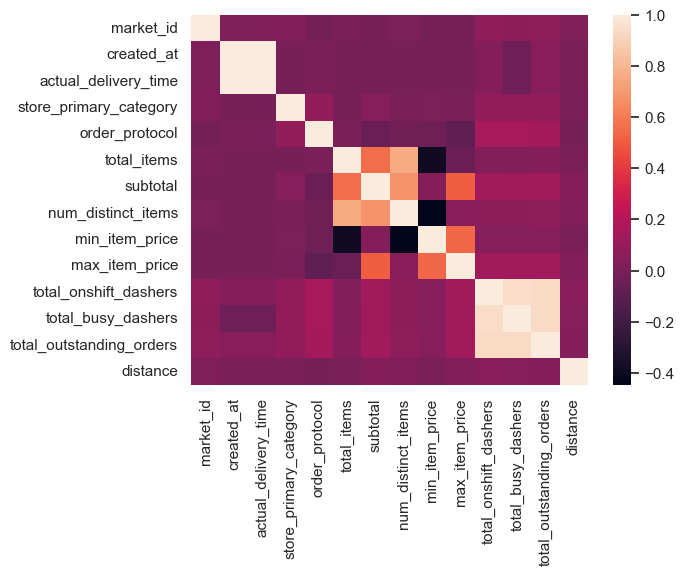

In [80]:
sns.heatmap(data.corr())
plt.show()

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [82]:
# we have one categorical column which we will change to integer for model
data['market_id'] = data['market_id'].astype('category')
data['order_protocol'] = data['order_protocol'].astype('category')
data['store_primary_category']= data['store_primary_category'].astype('category').cat.codes

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int8          
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [84]:
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [85]:
# Calculate time taken in minutes

data['time_taken'] = data['actual_delivery_time'] - data['created_at']
data['delivery_duration'] = pd.to_timedelta(data['time_taken'])/pd.Timedelta('60s')
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,delivery_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,0 days 00:47:00,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,0 days 00:44:00,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,0 days 00:55:00,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,0 days 00:59:00,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,0 days 00:46:00,46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [86]:
# Extract the hour and day of week from the 'created_at' timestamp

data['hour'] = data['created_at'].dt.hour
data['day'] = data['created_at'].dt.dayofweek
# data.head()

# Create a categorical feature 'isWeekend'
data['is_weekend'] = data['day'].apply(lambda x: 1 if x >= 5 else 0) 
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,delivery_duration,hour,day,is_weekend
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,0 days 00:47:00,47.0,22,4,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,0 days 00:44:00,44.0,21,1,0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,0 days 00:55:00,55.0,0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,0 days 00:59:00,59.0,3,3,0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,0 days 00:46:00,46.0,2,1,0


In [87]:
data['is_weekend'].value_counts()

is_weekend
0    115026
1     60751
Name: count, dtype: int64

In [88]:
# Drop unnecessary columns
data.drop(['time_taken','created_at','actual_delivery_time'],axis=1,inplace=True)

In [89]:
data.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,delivery_duration,hour,day,is_weekend
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4,0
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1,0
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,3,0
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,1,0


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [90]:
# Define target variable (y) and features (X)

X = data.drop(columns='delivery_duration')
y = data['delivery_duration']

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [91]:
# Split data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [95]:
x_train.shape

(140621, 15)

In [96]:
x_test.shape

(35156, 15)

In [97]:
35156 + 140621

175777

In [98]:
data.shape

(175777, 16)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [99]:
# Define numerical and categorical columns for easy EDA and data manipulation
categorical_columns = ['market_id', 'store_primary_category', 'order_protocol', 'is_weekend']
numerical_columns = [col for col in x_train.columns if col not in categorical_columns]

In [100]:
categorical_columns

['market_id', 'store_primary_category', 'order_protocol', 'is_weekend']

In [101]:
numerical_columns

['total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance',
 'hour',
 'day']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

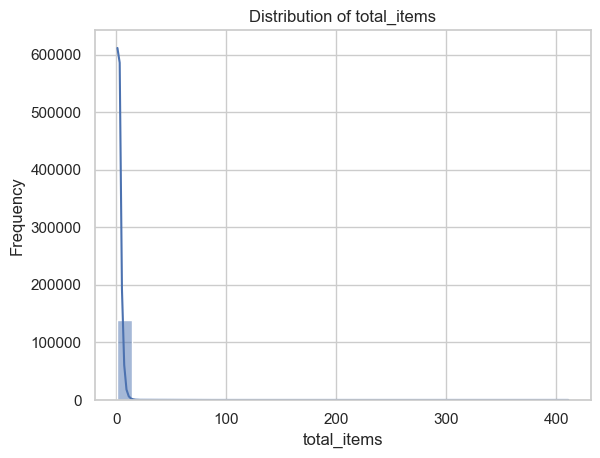

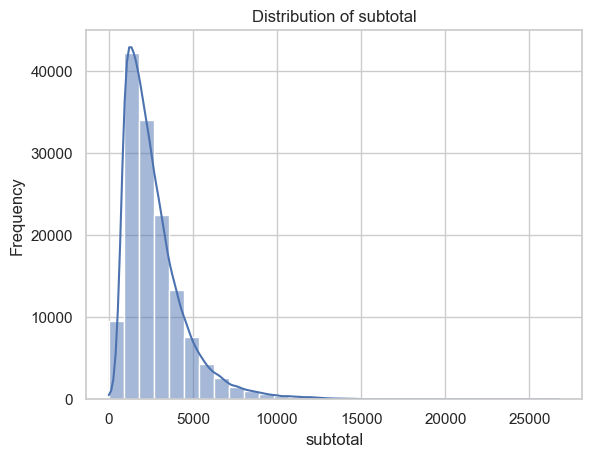

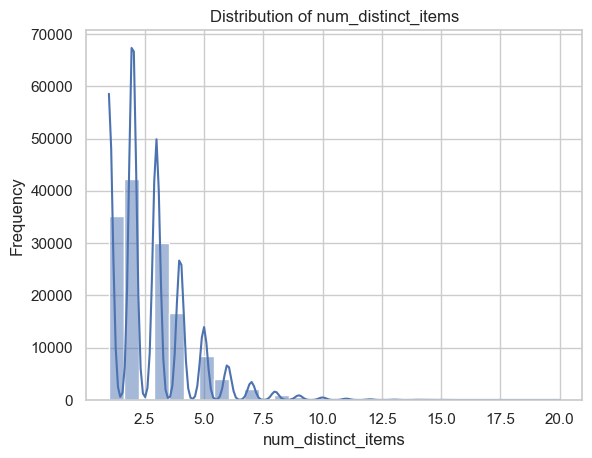

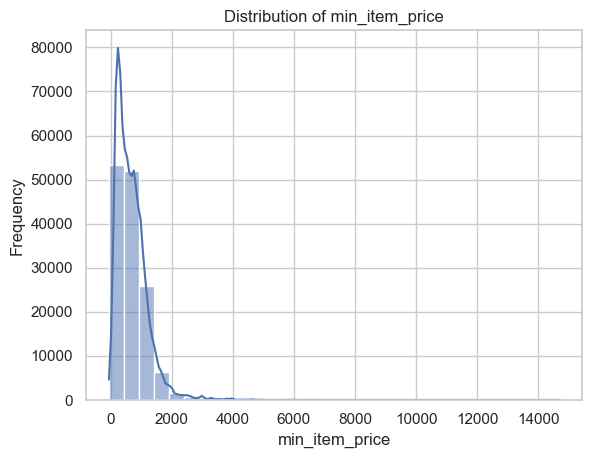

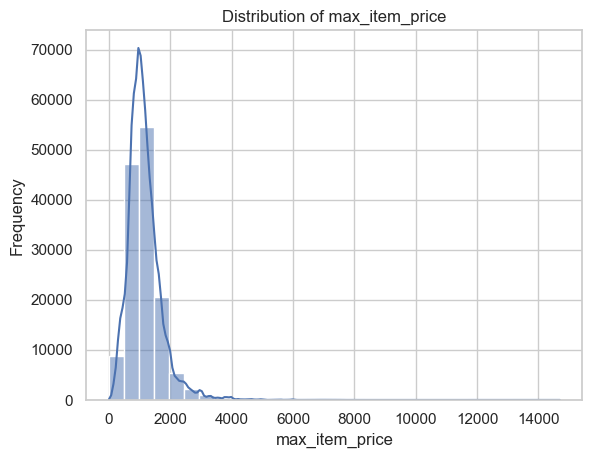

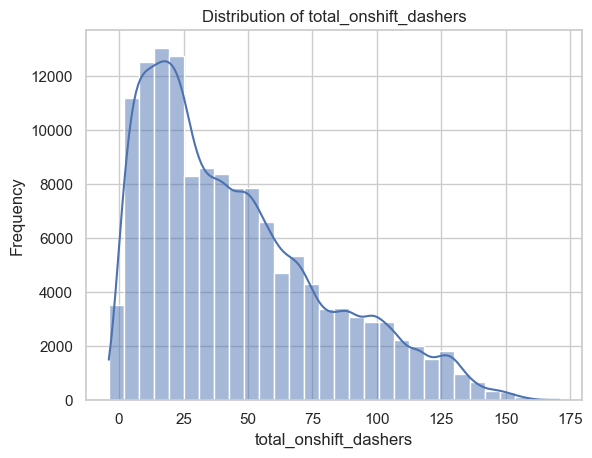

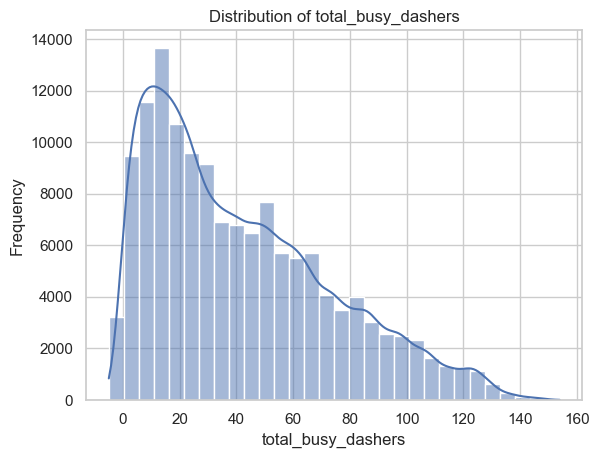

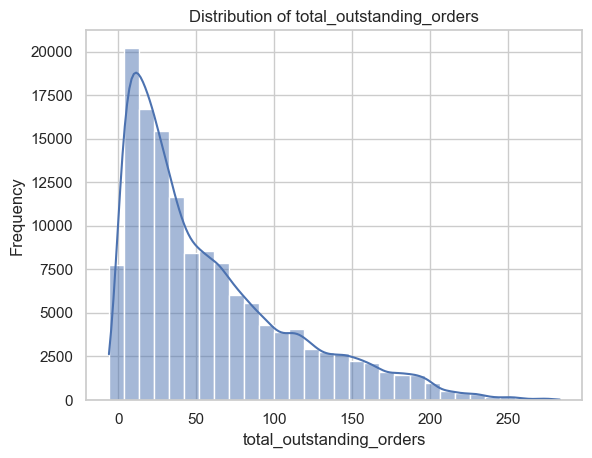

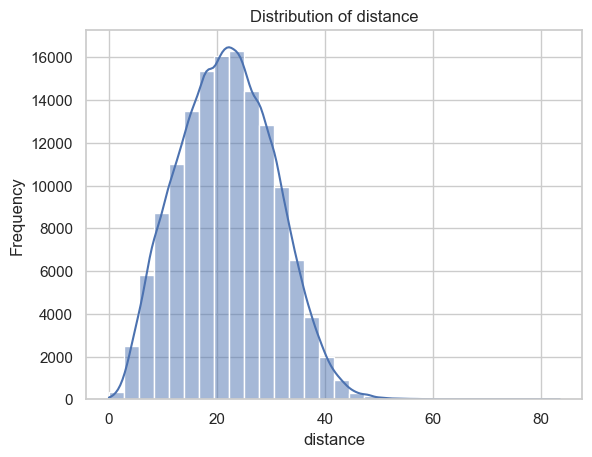

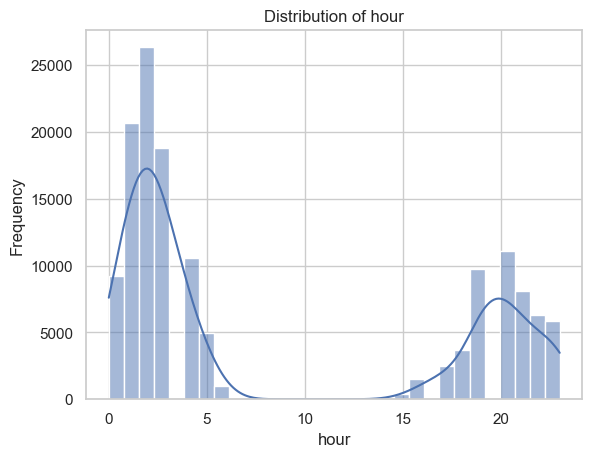

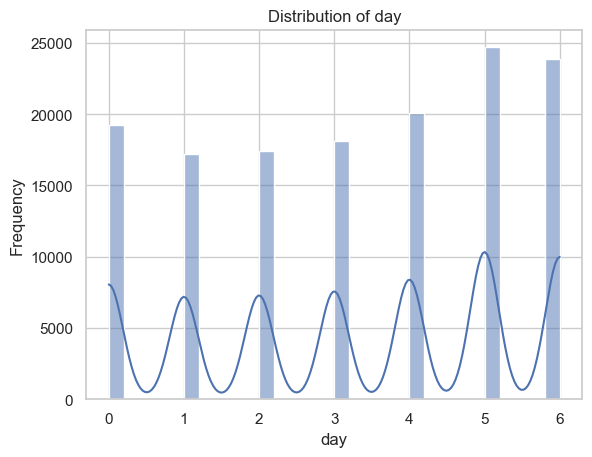

In [102]:
# Plot distributions for all numerical columns

sns.set(style='whitegrid')

for column in numerical_columns:
    sns.histplot(x_train[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [103]:
# Distribution of categorical columns

# for column in categorical_columns:
#     plt.figure(figsize=(5, 5))
#     sns.countplot(x_train[column])
#     plt.title(f'Frequency of categories in {column}')
#     plt.xlabel(column)
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

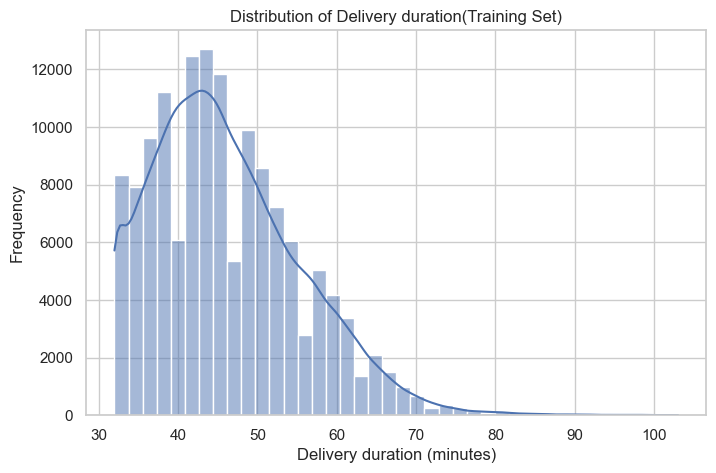

In [104]:
# Distribution of time_taken

plt.figure(figsize=(8,5))
sns.histplot(y_train, bins=40, kde=True)
plt.title('Distribution of Delivery duration(Training Set)')
plt.xlabel('Delivery duration (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

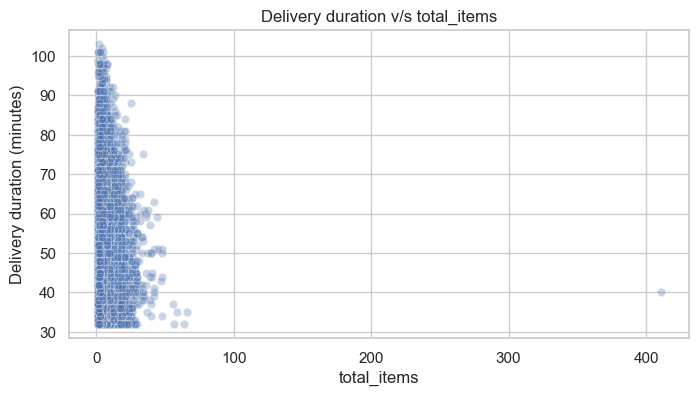

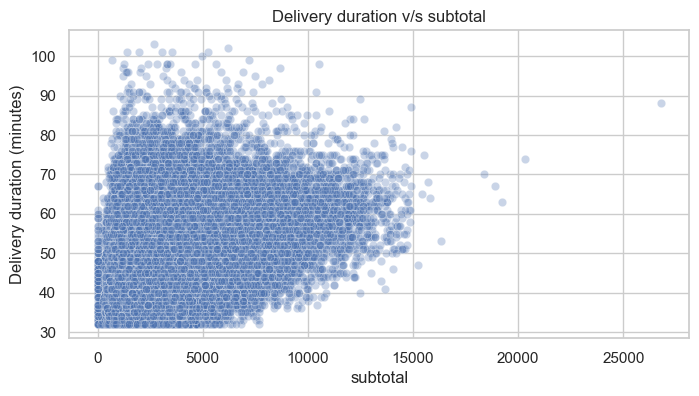

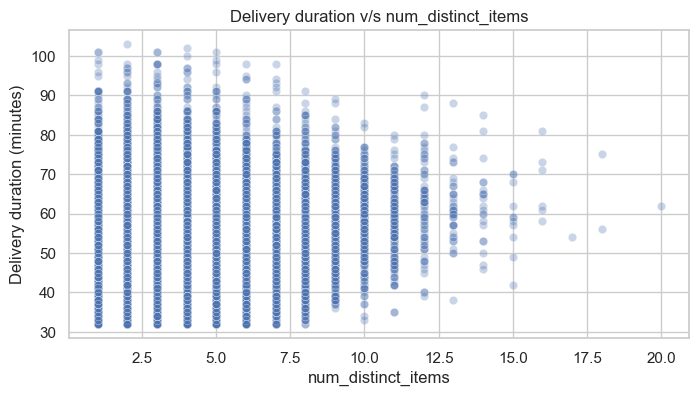

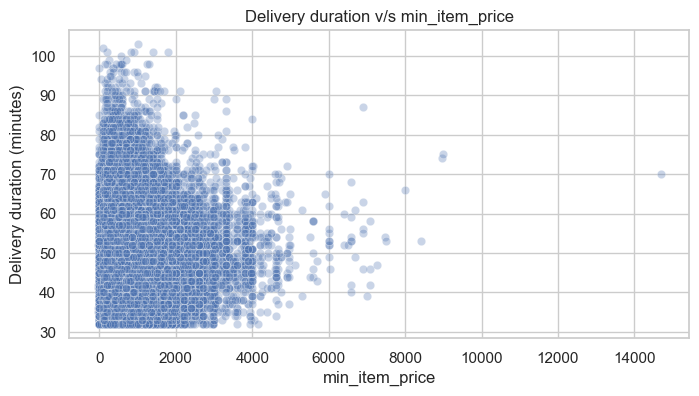

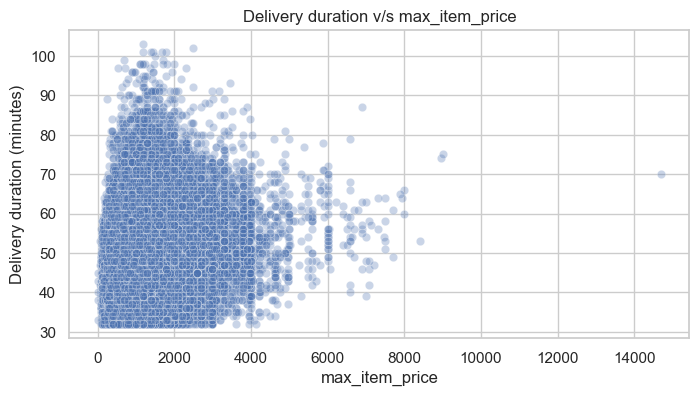

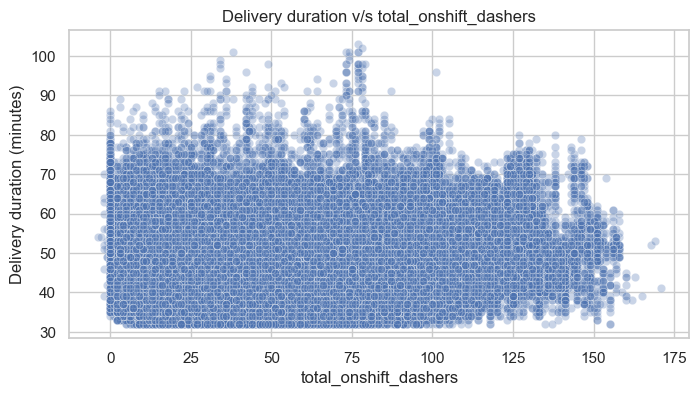

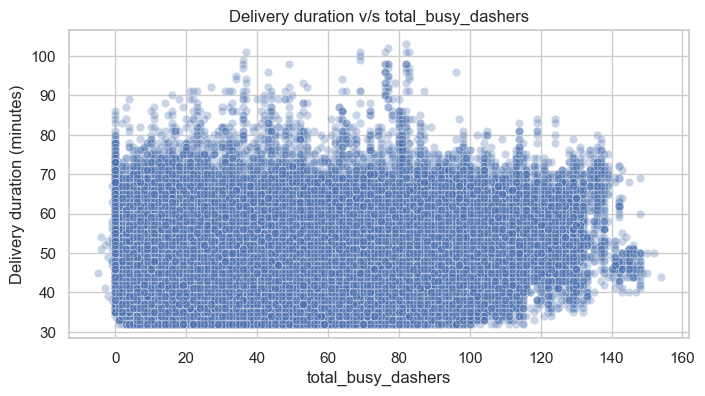

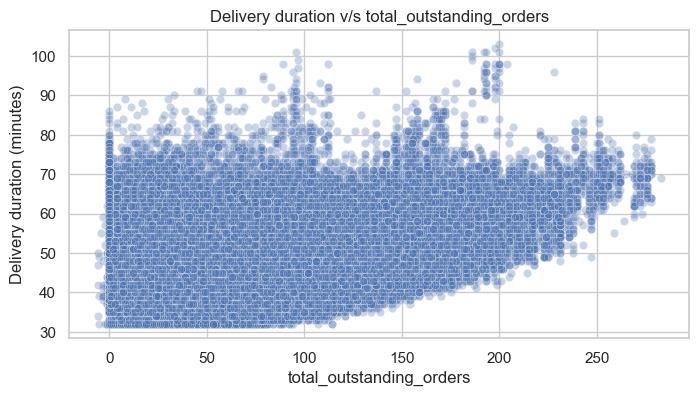

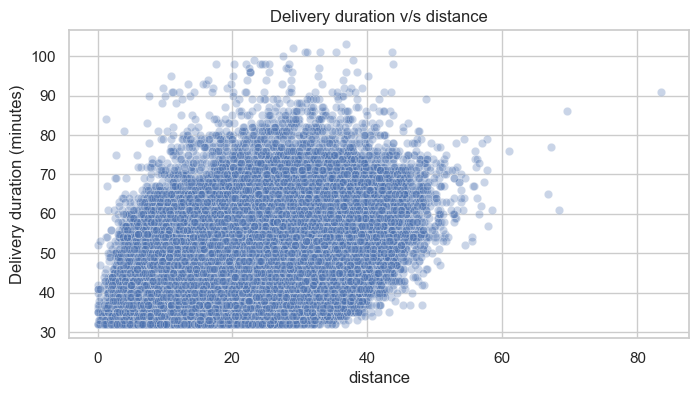

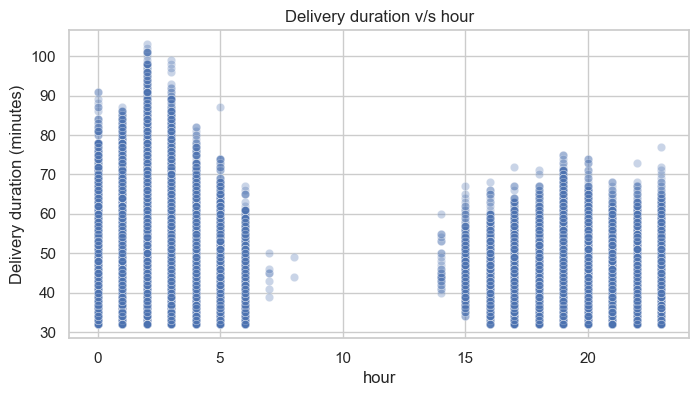

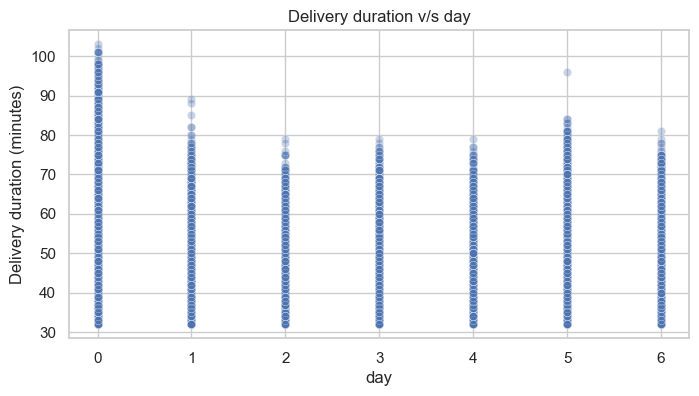

In [105]:
# Scatter plot to visualise the relationship between time_taken and other features

for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=x_train[col], y=y_train, alpha = 0.3)
    plt.title(f'Delivery duration v/s {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery duration (minutes)')
    plt.show()

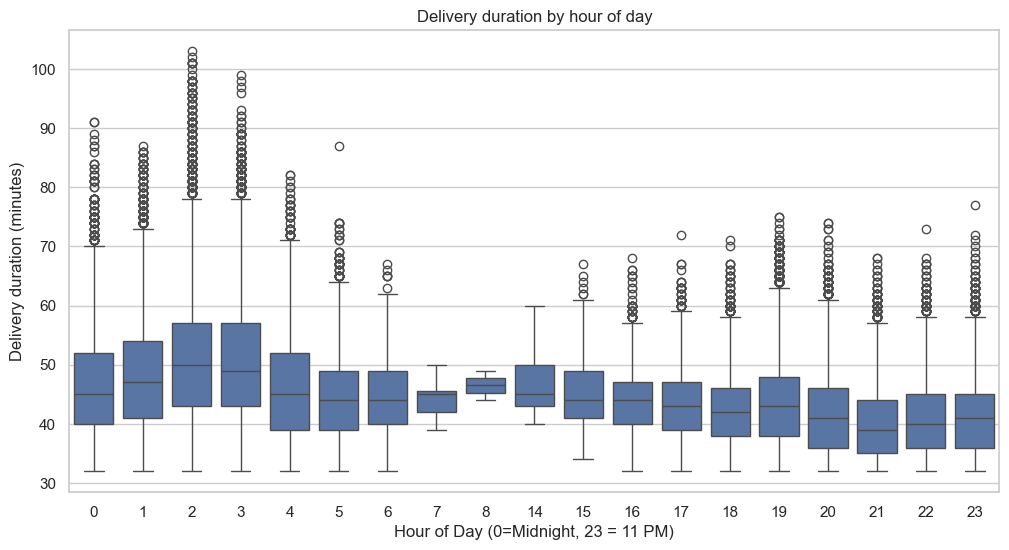

In [106]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=x_train['hour'], y=y_train)
plt.title('Delivery duration by hour of day')
plt.xlabel('Hour of Day (0=Midnight, 23 = 11 PM)')
plt.ylabel('Delivery duration (minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

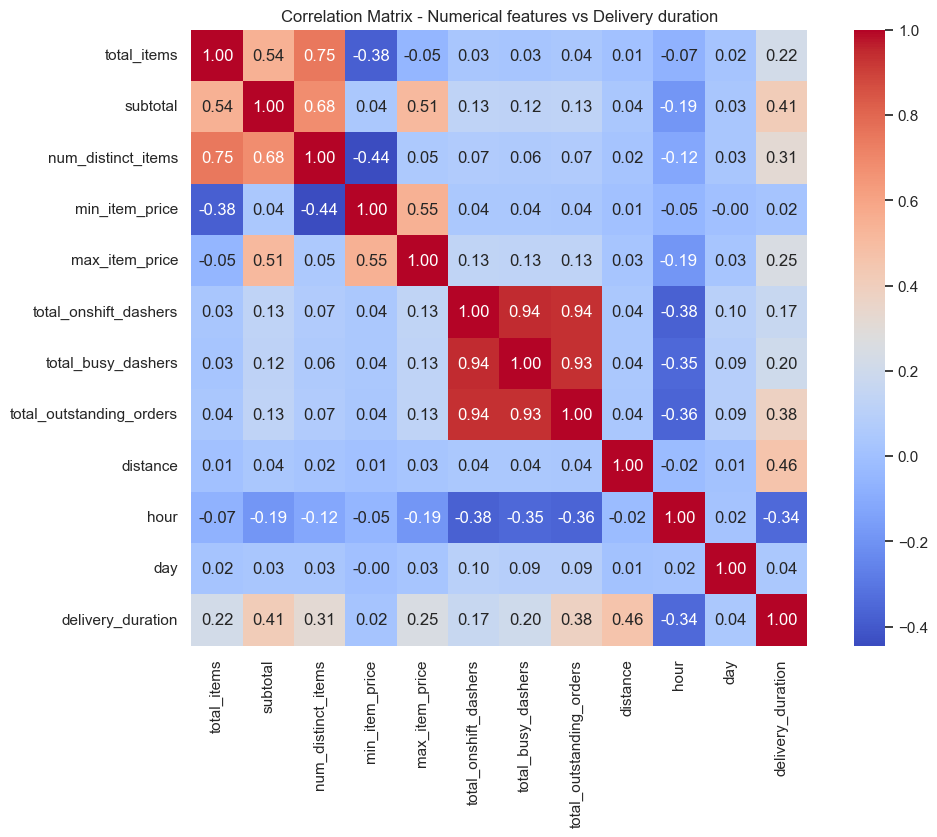

In [107]:
# Plot the heatmap of the correlation matrix

train_data=x_train.copy()
train_data['delivery_duration'] = y_train

# compute correlation matrix
corr_matrix = train_data[numerical_columns + ['delivery_duration']].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix - Numerical features vs Delivery duration')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [35]:
# Drop 3-5 weakly correlated columns from training dataset

correlations = corr_matrix['delivery_duration'].drop('delivery_duration').abs().sort_values()
correlations.head(5)

min_item_price           0.023411
day                      0.043793
total_onshift_dashers    0.168299
total_busy_dashers       0.203979
total_items              0.220891
Name: delivery_duration, dtype: float64

In [108]:
weak_features = correlations.head(5).index.tolist()
x_train = x_train.drop(columns=weak_features)
x_test = x_test.drop(columns=weak_features)

numerical_columns = [col for col in numerical_columns if col not in weak_features]

print('Dropped columns: ', weak_features)
print('Numerical columns: ', numerical_columns)

Dropped columns:  ['min_item_price', 'day', 'total_onshift_dashers', 'total_busy_dashers', 'total_items']
Numerical columns:  ['subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance', 'hour']


In [109]:
x_train.shape

(140621, 10)

In [110]:
x_test.shape

(35156, 10)

In [111]:
y_train.shape

(140621,)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

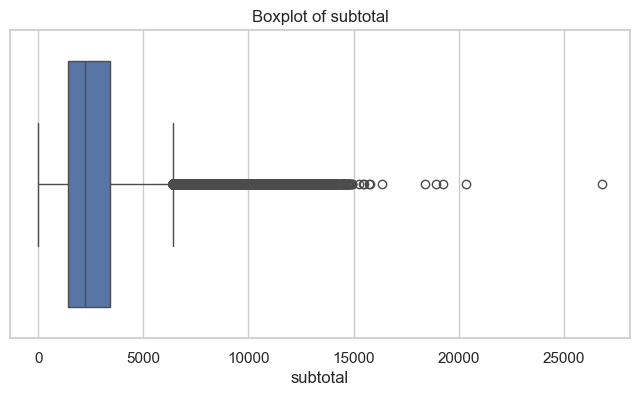

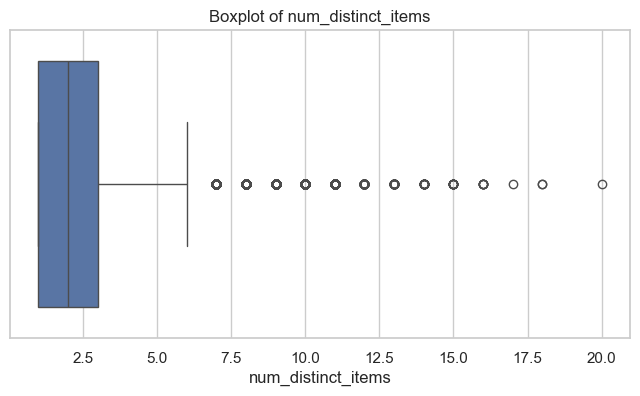

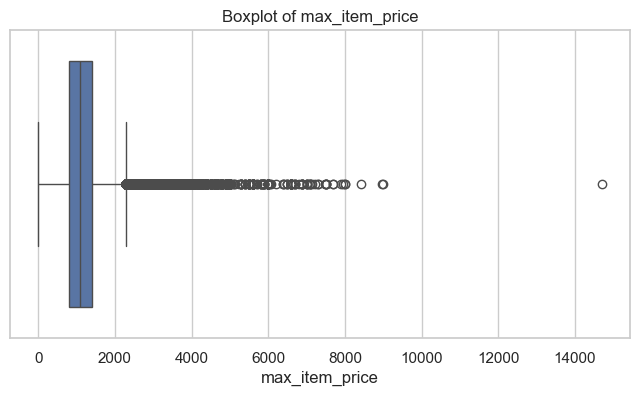

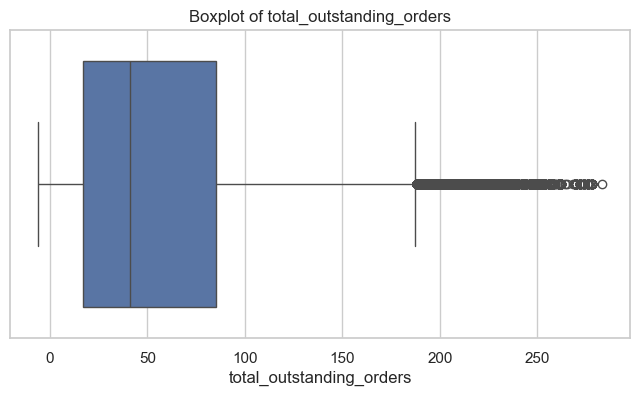

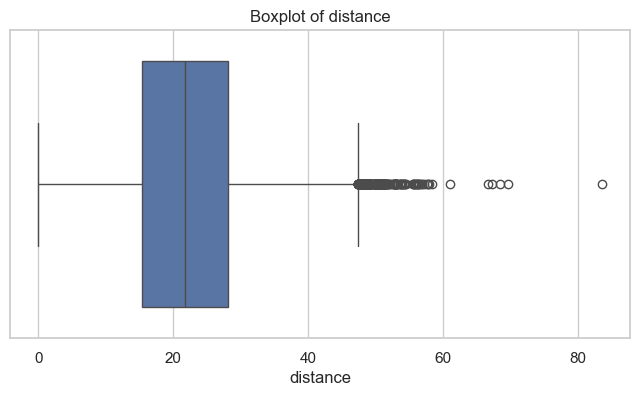

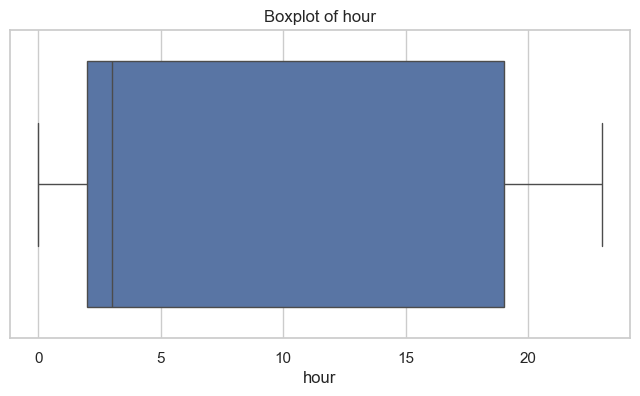

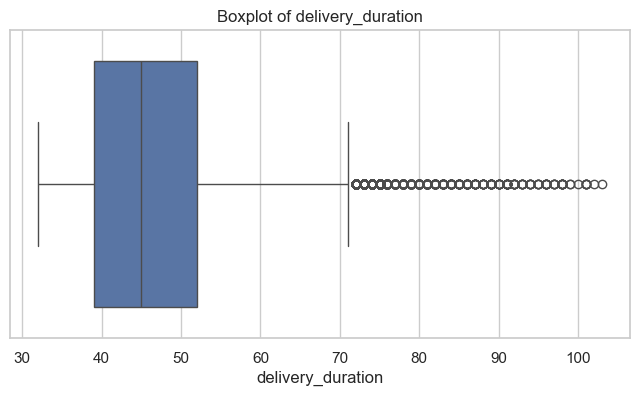

In [112]:
# Boxplot for time_taken

for col in numerical_columns + ['delivery_duration']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=x_train[col] if col != 'delivery_duration' else y_train)
    plt.title(f'Boxplot of {col}')
    plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [113]:
# Handle outliers
train_df = x_train.copy()
train_df['delivery_duration'] = y_train

columns_to_filter = ['delivery_duration', 'distance', 'subtotal']

# Remove outliers using IQR method

for col in columns_to_filter:
    q1 = train_df[col].quantile(0.25)
    q3 = train_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 = 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 
    train_df = train_df[(train_df[col]>= lower_bound) & (train_df[col] <= upper_bound)]

y_train = train_df['delivery_duration']
x_train = train_df.drop(columns='delivery_duration')

print('outliers removed. New shape of training set: ', x_train.shape, y_train.shape)


outliers removed. New shape of training set:  (24062, 10) (24062,)


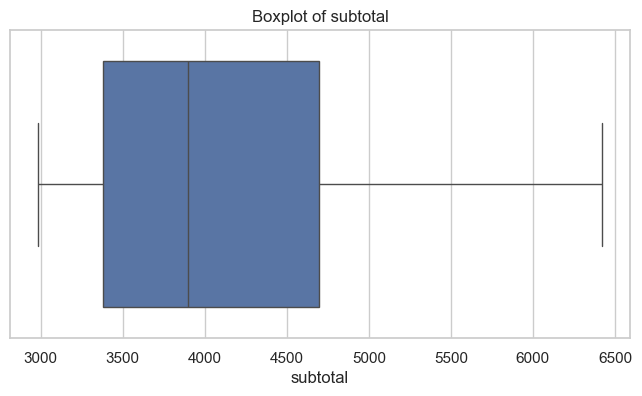

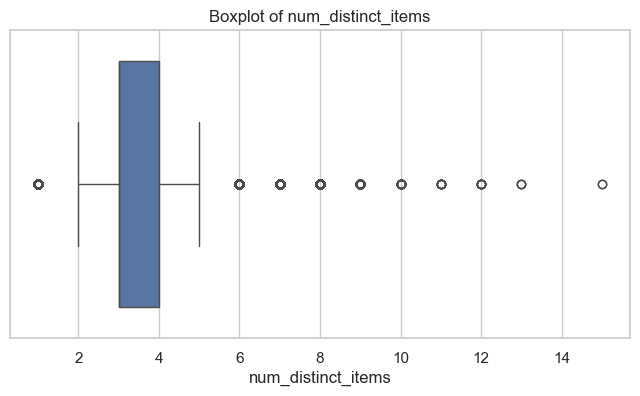

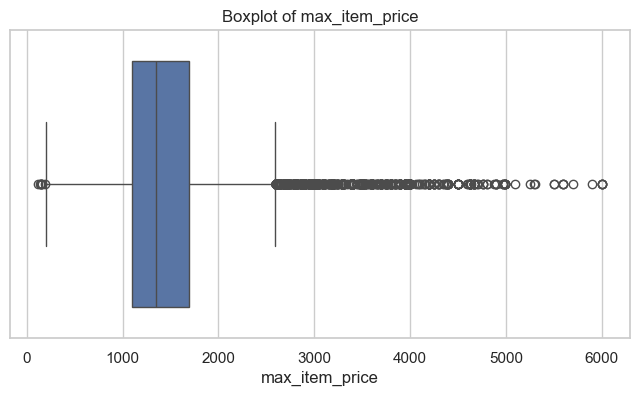

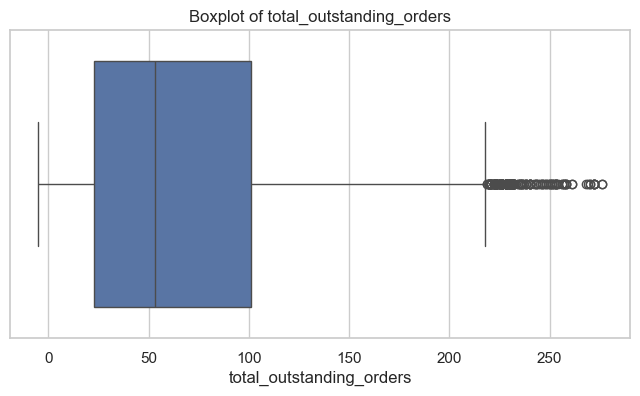

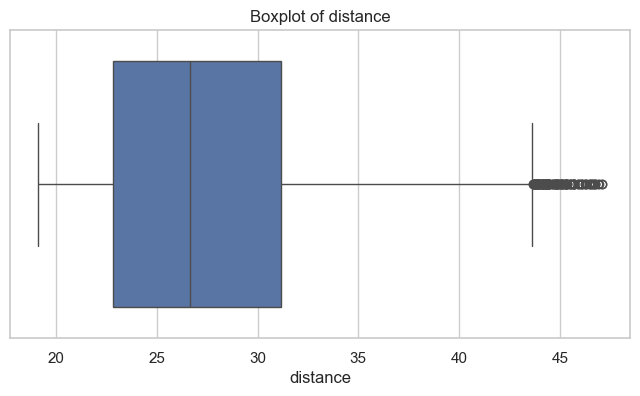

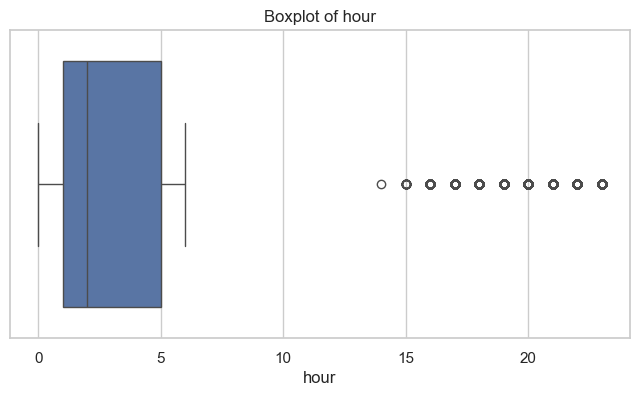

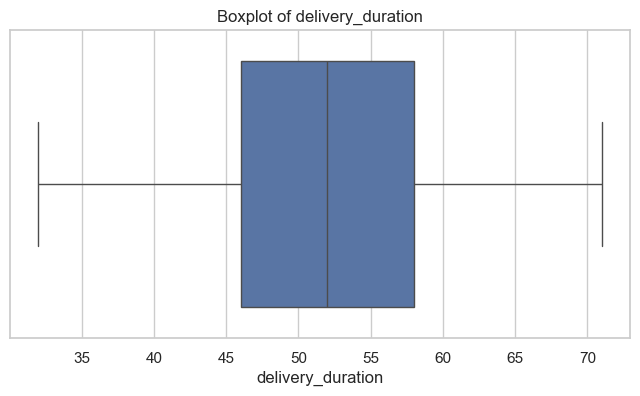

In [114]:
# Boxplot for time_taken

for col in numerical_columns + ['delivery_duration']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=x_train[col] if col != 'delivery_duration' else y_train)
    plt.title(f'Boxplot of {col}')
    plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [115]:
# Import libraries

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [116]:
# Apply scaling to the numerical columns
scaler = StandardScaler()

x_train_scaled = x_train.copy()
x_train_scaled[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])

x_test_scaled = x_test.copy()
x_test_scaled[numerical_columns] = scaler.fit_transform(x_test[numerical_columns])


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [117]:
# Create/Initialise the model
model = LinearRegression()

In [118]:
# Train the model using the training data
model.fit(x_train_scaled, y_train)

LinearRegression()

In [119]:
# Make predictions
y_pred = model.predict(x_test_scaled)

In [121]:
# Find results for evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE - {mse:.2f}')
print(f'R2 score - {r2:.2f}')


MSE - 73.70
R2 score - 0.16


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [123]:
# Loop through the number of features and test the model

scaler = StandardScaler()

x_train_num_scaled = pd.DataFrame(scaler.fit_transform(x_train[numerical_columns]), columns=numerical_columns, index=x_train.index)
x_test_num_scaled = pd.DataFrame(scaler.fit_transform(x_test[numerical_columns]), columns=numerical_columns, index=x_test.index)

x_train_cat = pd.get_dummies(x_train[categorical_columns], drop_first=True)
x_test_cat = pd.get_dummies(x_test[categorical_columns], drop_first=True)

x_test_cat = x_test_cat.reindex(columns=x_train_cat.columns, fill_value=0)

x_train_encoded = pd.concat([x_train_num_scaled, x_train_cat], axis=1)
x_test_encoded = pd.concat([x_test_num_scaled, x_test_cat], axis=1)

# x_train_full_scaled = pd.concat([pd.DataFrame(scaler.fit_transform(x_train[numerical_columns]), columns=numerical_columns, index=x_train.index),
#                                  x_train[categorical_columns].reset_index(drop=True)], axis=1)

# x_test_full_scaled = pd.concat([pd.DataFrame(scaler.fit_transform(x_test[numerical_columns]), columns=numerical_columns, index=x_test.index),
#                                  x_test[categorical_columns].reset_index(drop=True)], axis=1)

# x_train_encoded = pd.get_dummies(x_train_full_scaled, drop_first=True)
# x_test_encoded = pd.get_dummies(x_test_full_scaled, drop_first=True)

# x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)


results = []
model=LinearRegression()

for k in range(5, len(x_train_encoded.columns) + 1):
    selector = RFE(model, n_features_to_select=k)
    selector.fit(x_train_encoded, y_train)

    y_pred = selector.predict(x_test_encoded)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append((k, mse, r2))

results_df = pd.DataFrame(results, columns=['Num Features', 'MSE', 'R2']).sort_values(by='R2', ascending=False)
results_df.head()

,Num Features,MSE,R2
14,19,70.991918,0.186567
13,18,71.029664,0.186134
12,17,71.502322,0.180719
11,16,72.267664,0.171949
10,15,72.377004,0.170696


In [124]:
results_df

,Num Features,MSE,R2
14,19,70.991918,0.186567
13,18,71.029664,0.186134
12,17,71.502322,0.180719
11,16,72.267664,0.171949
10,15,72.377004,0.170696
9,14,74.155106,0.150323
8,13,80.657919,0.075813
7,12,80.758244,0.074663
6,11,82.385674,0.056016
5,10,82.467063,0.055084


In [63]:
x_train.shape

(24062, 10)

In [60]:
y_train.shape

(24062,)

In [70]:
# Build the final model with selected number of features

data.shape

(175777, 16)

In [72]:
x_train.shape

(35156, 10)

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram



[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>
>Yes the dataset contains various categorical variables:
>1. market-id : represenets different delivery zones or ciites
>2. order_protocol : indicates how the order was placed
>3. store_primary_category : the type of store
>4. day : day of the week
>5. is_weekend
>
> market_id and order_protocol - these features showed distinct variation in delivery duration when visualized using boxplots. Some markets consistently had higher median delivery times likely due to urban layout, traffic, etc. Order protocol can impact prep or dispatch time.
>
>day and is_weekend: deliveries placed on weekends tended to have slightly longer durations. Weekday vs weekend patterns help the model adjust expectations based on the time of the week.
>
>Categorical variables are significant predictors of delivery duration. Encoding them improves model performance, as they capture patterns not evident in numeric features alone.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>
>test_size=0.2 means 20% of the data is for testing, and 80% is for training. It is common to use 20-30% of your data for the test set. random_state=42 ensures the split is the same every time you run the code, which is handy for reproducibility.




---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>
>distance.
>Approximately +0.70 to 0.75 dpending on the sample size and outliers.
>distance represents the physical distance from the restaurant to the customer
>It's logically and statistically the strongest predictor. The further the delivery, the longer it takes.
>No other numerical variables, shows as strrong a relationship



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>We used the Interquartile Range (IQR Method) which is a standard statistical technique for identifying outliers.
>Steps followed:
> - Selected key numerical features prone to extreme values like delivery duration, distance, subtotal
> - calculated IQR for each where IQR = Q3-Q1
> - defined outlier bounds
> - filtered rows by removing any row where the selected feature value was outside these bounds



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>1. distance - most influential feature, directly affects how long a delivery takes, strongest positive correlation with delivery_duration
>2. subtotal - represents thte total order value. May correlate with larger or more complex orders, which can take longer to prepare and pack
>3. hour of the day - indicates the time of the day the order was placed. Captures delivery slowdowns during rush-hours, lunch/dinner peaks or late nights when fewer dashers are available.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear regression is a supervised learning algorithm used to predict a continuous target variable based on one or more input features. It assumes a linear relationship between the independent variables and dependent variables.
> There are two types => simple linear regression with one independent variable and multiple linear regression with two or more independent variables.
> Goal of linear regression is to find the best fitting line or hyperplane by minimizing the error between the predicted values and actual values. This is done by minimizing the cost function - usually the Mean Squared error(MSE)
> The model uses Ordinary Least squares to compute coefficients that minimize MSE
> Assumptions of linear regression:
> - linearity - relationship b/w predictors and target is linear
> - independence - observations are independent of each other
> - homoscedasticity - constant variance of residuals
> - normality of residuals - errors are normally distributed
> - no multicollinearity - predictors are not highly correlated with each other
>
> Stpes usually include:
> 1. Identify the target variable by understanding the features/independent variables
> 2. load and exploer the data and check for missing values, datatype mismatches, anomalies, etc.
> 3. Feature engineering - where datatype conversions, new feature creations and categorical variable conversions for encoding happens
> 4. define target and features aka the X and y
> 5. Train and test data split for training and prediction and testing purposes
> 6. Handling of outliers to detect and remove extreme values
> 7. scaling numerical features for standardizing them
> 8. Fitting the linear regression model
> 9. making predictions
> 10. evaluating the model by calculating MSE and R2 scores
> 11. interpreting the coefficients and finetuning based on it by repeating the steps



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>
>A model with exactly one explanatory variable is a simple linear regression; a model with two or more explanatory variables is a multiple linear regression. This term is distinct from multivariate linear regression, which predicts multiple correlated dependent variables rather than a single dependent variable.




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>
>In linear regression, the cost function measures the error between the model's predictions and the actual values. It's minimized to improve the model's accuracy and make it more effective at predicting outcomes. This minimization process, often achieved using techniques like gradient descent, helps the model find the best-fit line or equation that minimizes the overall error across the dataset.
>
>The cost function serves as a feedback mechanism, quantifying how well the model is performing. A lower cost value indicates better predictions, as it reflects a smaller difference between the predicted and actual values.
>
>The primary goal is to find the model parameters (like the slope and intercept in simple linear regression) that minimize the cost function. This is often done iteratively, where the algorithm adjusts the parameters based on the cost function's "gradient" (the rate of change of the cost function with respect to the parameters).
>
>One common technique for minimizing the cost function is gradient descent. This algorithm starts with random initial parameter values and then iteratively adjusts them in the direction that reduces the cost function. The process continues until a minimum cost is reached, indicating the model is making the best possible predictions.
>
>By minimizing the cost function, the model learns to adapt its parameters to better align its predictions with the actual data, leading to improved accuracy and predictive power. 






---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>
>Overfitting and underfitting are two common challenges in machine learning model training. Overfitting occurs when a model learns the training data too well, including the noise and random fluctuations, leading to poor performance on new, unseen data. Underfitting happens when the model is too simple and fails to capture the underlying patterns in the data, resulting in poor performance on both training and unseen data.
>
>Characteristics of overfitting:
> - High accuracy on the training set but low accuracy on unseen data. 
> - The model has memorized the training data rather than learned the underlying patterns. 
> - Low bias and high variance.
>
>Characteristics of underfitting:
> - Poor performance on both training and unseen data. 
> - High bias and low variance. 
>
>
>In essence, overfitting is like learning a very specific case and failing to generalize to other similar cases, while underfitting is like failing to learn the general case at all. 





---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>
>Residual plots help diagnose a linear regression model by visualizing the discrepancies between observed and predicted values. They reveal if a linear model is appropriate, if there are non-linear relationships, if the variance of errors is constant (homoscedasticity), and if there are any outliers.
>Residual plots helps in checking for Linearity, Assessing Homoscedasticity, Identifying Outliers, Checking Independence and Evaluating Normality.
>
>In summary, residual plots are a visual tool that helps analysts assess the adequacy of a linear regression model by examining the patterns and characteristics of the residuals. They can reveal potential issues such as non-linearity, non-constant variance, outliers, and non-independence, which can guide the modeler in making appropriate adjustments to improve the model's fit and reliability. 
